Feature Scaling Techinique 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"./data/loan2.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

C:\Users\bhard\AppData\Local\Temp\ipykernel_16284\4246328762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


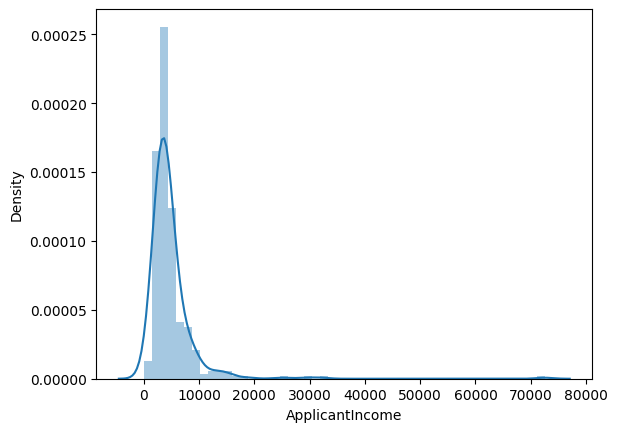

In [5]:
sns.distplot(dataset["ApplicantIncome"])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss= StandardScaler()

In [8]:
ss.fit(dataset[["ApplicantIncome"]])

dataset["ApplicantIncome_ss"] = pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]) , columns=["x"])
dataset["ApplicantIncome_ss"] =ss.fit_transform(dataset[["ApplicantIncome"]])

In [9]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_ss
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0.186461
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,-0.352692
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0.039641
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,-0.502774
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,-0.311909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,-0.162439
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,-0.132056
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,-0.317211
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0.039641


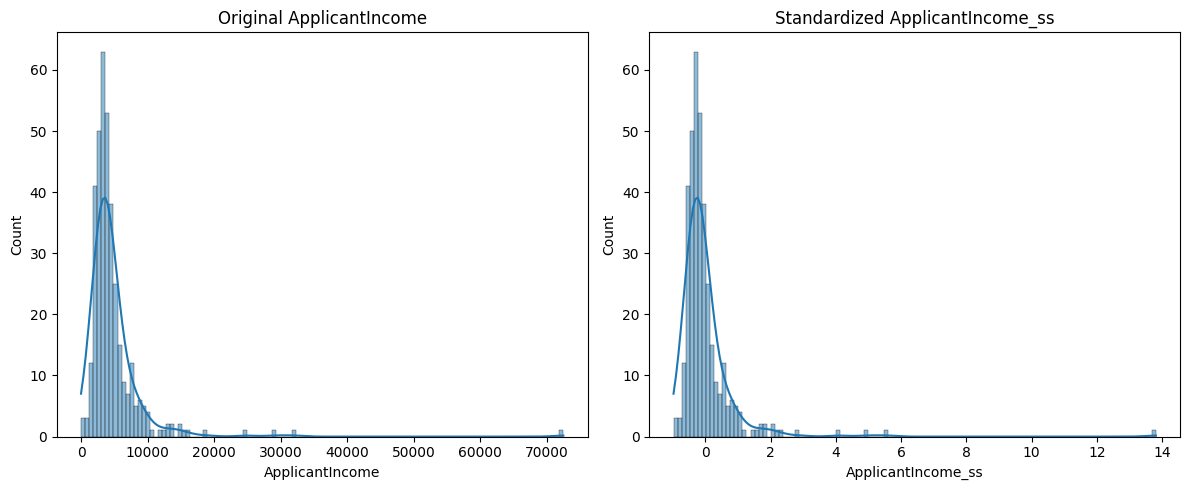

In [10]:
plt.figure(figsize=(12, 5))

# Plot original ApplicantIncome
plt.subplot(1, 2, 1)
sns.histplot(dataset["ApplicantIncome"], kde=True)
plt.title("Original ApplicantIncome")

# Plot standardized ApplicantIncome_ss
plt.subplot(1, 2, 2)
sns.histplot(dataset["ApplicantIncome_ss"], kde=True)
plt.title("Standardized ApplicantIncome_ss")

plt.tight_layout()
plt.show()

In [11]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,367.000000,367.000000,362.000000,361.000000,338.000000,3.670000e+02
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444,-8.470366e-17
std,4910.685399,2334.232099,61.366652,65.156643,0.380150,1.001365e+00
min,0.000000,0.000000,28.000000,6.000000,0.000000,-9.799365e-01
25%,2864.000000,0.000000,100.250000,360.000000,1.000000,-3.959224e-01
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000,-2.079122e-01
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000,5.187623e-02
max,72529.000000,24000.000000,550.000000,480.000000,1.000000,1.380986e+01


In [12]:
print(dataset["ApplicantIncome_ss"].mean())
print(dataset["ApplicantIncome_ss"].std()) 

-8.470366400409914e-17
1.0013651883489652


In [13]:
n = 3
for i in range(0 ,n+1):
     print(i)

0
1
2
3
